<a href="https://colab.research.google.com/github/estrella-celeste/ColabNoteboook/blob/main/EstrDiazU4proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

# Unit 4 Project

# Introduction and data set up

Not a sports person.

I'm not excited, nor I hate it.

Lacking time towards

finding suitable data

Stuck with baskeball

Maybe I'll find it interesting.

Basketball project

Imagine that this is fun

maybe worth the pain

So lets get started...

Setting up...

In [3]:
#Import NBA player data from the 2023-2024 season
#Reminder to use the raw data when importing from github
url_cs ='https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
basketball = pd.read_csv(url_cs)

In [4]:
#Turns the position column into a categorical variable
basketball = pd.read_csv(url_cs,dtype={'Pos':'category'})
basketball=basketball.query("MP>300")

 **DATA SET KEY *This is For Personal Reference***
* Player = player's name
* Age = player's age
*Pos = position
*Tm = Team
*G = games
*GS = game started
*MP = Minutes Played
*FG = Field Goal makes
*FGA = Field Goal Attempts
*FG% = FG percentage
*3P = 3 point makes
*3PA = 3 point attempts
*3P% = 3 point percentage
*2P = 2 point makes
*2PA = 2 point attempts
*2P% = 2 point percentage
*eFG% = effective field goal percentage
*FT = free throw makes
*FTA = free throw attempted
*FT% = free throw percentage
*ORB = offensive rebounds by team
*DRB = defensive rebounds by team
*TRB = total rebounds by team
*AST = total assists by team
*STL = steals by team
*BLK = blocks by team
*TOV = turnovers by team
*PF = personal fouls by team
*PTS = points

Aaaand ... Finished setting up.

Behold, the breathtaking raw data!

In [5]:
#Full data set aka the RAW data
basketball

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


I am going to display the players, position (Pos), total rebounds by team (TRB) and points (PTS), so I am cutting out the rest. I am goint to use the Pos and TRB columns as my data.

Why these three columns?

* With the raw data, there are many ways I can analyze the data but I just
want it to keep it simple.

* So, its easy to categorize Pos, and TRB and PTS is the data that falls into many of the Pos categories.

* We are trying to recreate the soccer example but with basketball

My intentions is to analyze the relationship about position and the number of total rebounds by team and total points.

In [6]:
#Choosing which columns to show
basketball[['Pos','TRB','PTS']]

,Pos,TRB,PTS
0,PF-C,487,565
1,C,737,1367
2,SG,216,455
3,PF,352,654
4,SG,167,655
...,...,...,...
567,PF,103,137
568,PG,149,1389
569,C,208,222
570,C,112,76


# Finding Prior and Likelihood

Now ... time to find the likelihood

*This is a personal note*

*   *Likelihood is not the same as prior*
  * *Prior are predictions*
  * *Likelihood uses priors and data*
*   *Likelihood is the main distribution*



<Axes: ylabel='Pos'>

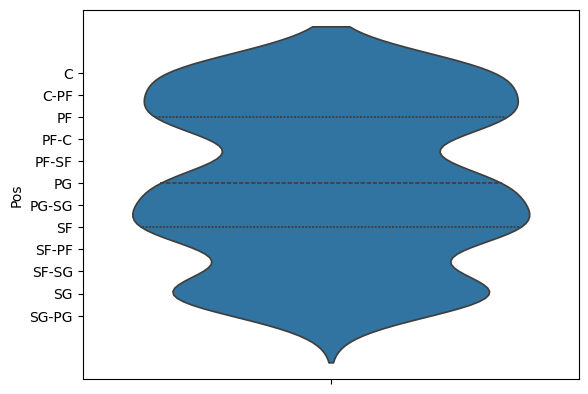

In [7]:
#PTS Violin plot
sns.violinplot(basketball.Pos,inner='quart')

(array([76., 84., 80., 75., 86.,  2.,  4.,  3.,  1.,  2.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

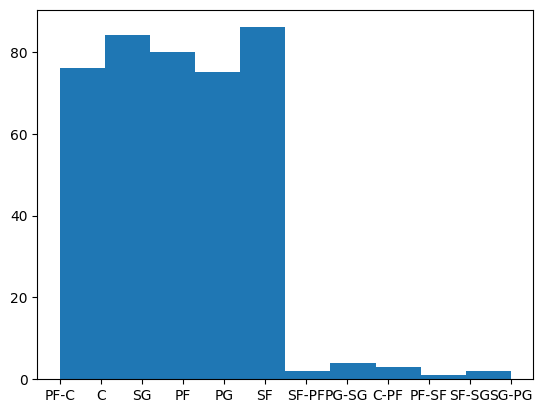

In [8]:
#PTS histogram plot
plt.hist(basketball.Pos)

<Axes: ylabel='TRB'>

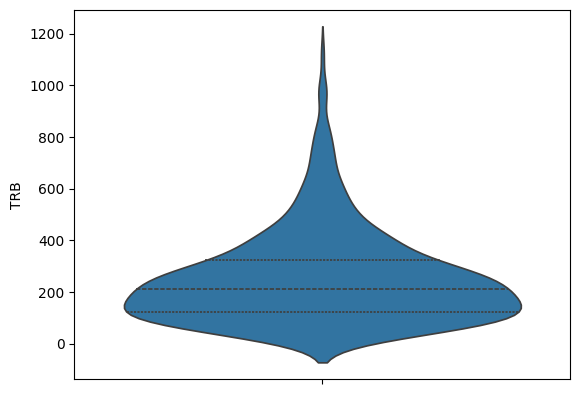

In [9]:
#TRB violin plot
sns.violinplot(basketball.TRB,inner='quart')

(array([132., 114.,  81.,  40.,  21.,  10.,   7.,   4.,   3.,   1.]),
 array([  35. ,  143.5,  252. ,  360.5,  469. ,  577.5,  686. ,  794.5,
         903. , 1011.5, 1120. ]),
 <BarContainer object of 10 artists>)

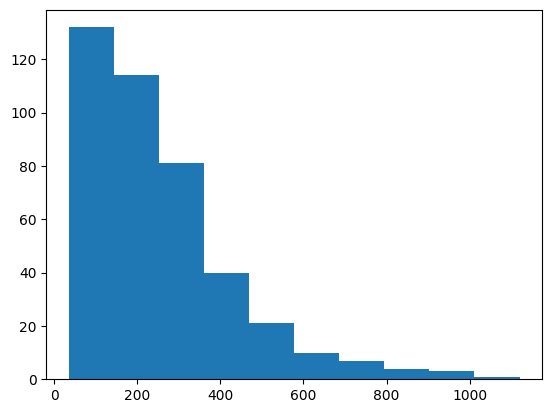

In [10]:
#TRB Histogram plot
plt.hist(basketball.TRB)

Finished plotting

I didn't know how to interpret the violin plot for a distribution. Soooo.... I searched interned and found this [website](https://www.atlassian.com/data/charts/violin-plot-complete-guide)....

I learned that violin plots were similar to histograms and are used for similar purposes. So I used the histogram to compare and understand how to read the violin plot.



The TRB violin plot shows the density towards the bottom. So to view the shape of the data better, the histogram is there to help me vizualize the shape. The histogram shows that it is a positive skew.

The Pos violin plot looks weird and the Pos histogram looks that there is more data in some positions than others.

*Note to self*
*   *A left skew = negative skew = __/\*
*  *A right skew = positive skew = /\\__*

Likelihood would be Gamma distribution and Normal distribution (based on Mr. Arredondo's recommendation). I will try both models.


Im going to start with the gamma distribution since we are trying to see if it works.

Time to chooose sub priors based on the violin plot
* On TRB data -------------> gamma distribution and lognormal distribution


*These are the priors for the prior*

In [11]:
import preliz as pz

*Personal Use*

*These priors are here to help me where I get the numbers*

<Axes: >

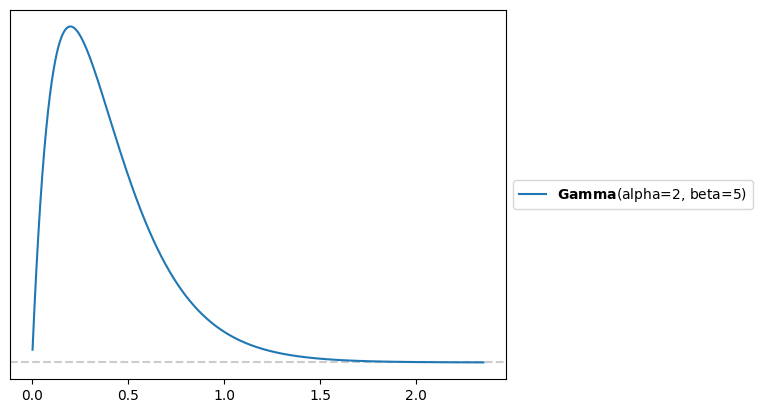

In [12]:
#Gamma dist for TRB
pz.Gamma(alpha=2, beta=5).plot_pdf()

<Axes: >

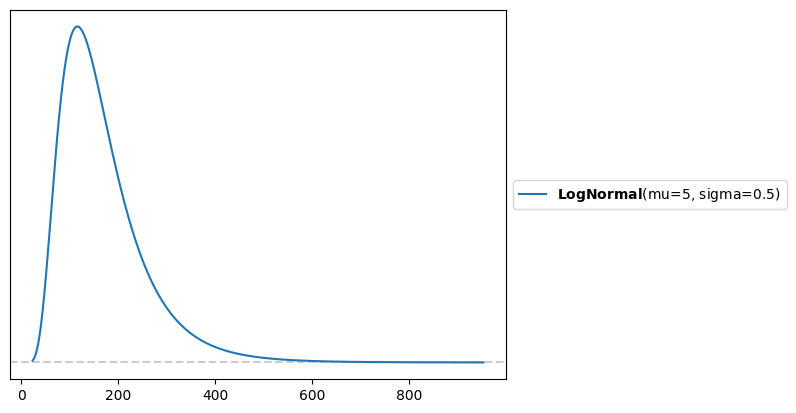

In [13]:
#LogNormal dist for PTS
pz.LogNormal(mu = 5, sigma=.5).plot_pdf()

Here are the priors:

---> Lognormal distribution and gamma distribution

<Axes: >

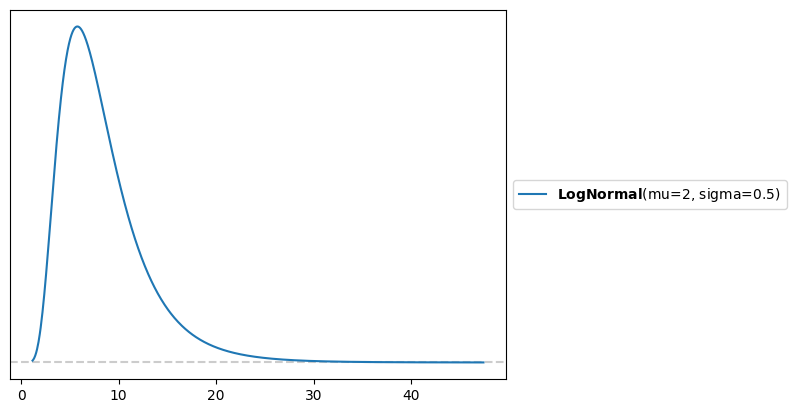

In [14]:
#To vizualize log normal prior
pz.LogNormal(mu=2, sigma=.5).plot_pdf()

# Running the model

## Categorizing positions

Now ... Categorizing and making pymc's life easier

In [15]:
pos_encode = pd.Categorical(basketball['Pos'])
pos_encode

['PF-C', 'C', 'SG', 'PF', 'SG', ..., 'PF', 'PG', 'C', 'C', 'C']
Length: 413
Categories (12, object): ['C', 'C-PF', 'PF', 'PF-C', ..., 'SF-PF', 'SF-SG', 'SG', 'SG-PG']

In [16]:
pos_idx = pos_encode.codes
pos_idx

array([ 3,  0, 10,  2, 10, 10,  0,  5,  2,  2,  5,  7,  7,  0,  0,  7,  5,
        0,  2, 10,  5,  2,  2, 10, 10,  7,  2, 10, 10,  7,  2,  5,  7,  0,
        0,  5, 10,  8,  2,  5,  7,  2,  5, 10,  7,  7,  7,  5,  7,  6,  7,
        2,  7,  5,  0,  7, 10, 10,  2, 10,  2,  0,  5,  0, 10,  7, 10, 10,
        0,  2,  7,  2,  0,  5,  7,  7,  8,  7,  2,  5, 10,  5,  5,  0, 10,
        7, 10,  2,  5, 10,  5,  7, 10,  0,  7,  5,  2,  0,  2, 10, 10,  0,
        0,  7,  5,  0,  2,  5,  7, 10, 10,  5,  5,  5,  1,  4,  5,  5,  2,
       10,  5,  2,  5,  0,  5,  2, 10,  5,  2, 10,  2, 10,  2, 10, 10,  2,
        5,  5,  7,  5, 10, 10,  2,  7,  0,  7, 10,  0,  5,  7,  5,  2, 10,
        9,  2,  5,  5, 10,  1,  0,  0,  5,  7,  7, 10,  7,  5,  7,  7, 10,
        2, 10, 10,  2,  0,  0,  5,  2,  2,  7,  0, 10,  2,  7,  7,  0,  7,
        7,  5,  5,  0,  2, 10, 10,  0,  7,  0,  7,  7,  0,  5,  2,  2,  0,
        2, 10, 10,  0,  7, 10,  5,  7,  0,  2,  0,  0,  2,  5,  2,  0, 10,
        5,  2,  7,  7,  7

In [17]:
pos_coords = {'Pos': pos_encode.categories}
pos_coords

{'Pos': Index(['C', 'C-PF', 'PF', 'PF-C', 'PF-SF', 'PG', 'PG-SG', 'SF', 'SF-PF',
        'SF-SG', 'SG', 'SG-PG'],
       dtype='object')}

## Model with Gamma likelihood

Here comes pymc in the picture (sigh). :(

In [18]:
#This is model with the gamma likelihood
with pm.Model(coords=pos_coords) as basketball_model:
    #hyperpriors. Notice how there's no dims argument
    #this means that the hyperprior is shared across
    #μ_mu and μ_sd builds the μ prior.
    μ_mu = pm.LogNormal('μ_mu', mu = 5, sigma = .5)
    μ_sd = pm.Gamma('μ_sd', mu = 2, sigma=5)

    #priors. There is a different prior,
    #μ has hyperpriors
    μ = pm.Gamma('μ',
                  mu = μ_mu,
                  sigma = μ_sd,
                  dims = "Pos")

    σ = pm.LogNormal('σ', mu=2,sigma=.5,
                      dims = "Pos")


    #likelihood
    y = pm.Gamma('y',
                  mu = μ[pos_idx],
                  sigma = σ[pos_idx],
                  observed = basketball.TRB)

    #cs for chemshift, h for heirarchical
    idata_bsktballG = pm.sample(target_accept=0.98)

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


After a long while, pymc managed to compute the model. The model shows the priors build on each other to compute the likelihood.



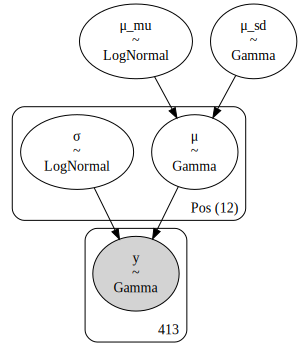

In [19]:
#Helps visualize the model
pm.model_to_graphviz(basketball_model)

In [20]:
#Using arviZ to find the rhat values
az.rhat(idata_bsktballG)

<xarray.Dataset> Size: 448B
Dimensions:  (Pos: 12)
Coordinates:
  * Pos      (Pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    μ        (Pos) float64 96B 1.0 1.005 1.0 1.007 1.002 ... 1.002 1.003 1.0 1.0
    μ_mu     float64 8B 1.0
    μ_sd     float64 8B 1.003
    σ        (Pos) float64 96B 0.9999 1.0 1.001 1.002 ... 1.003 1.001 1.001 1.0

array([<Axes: >], dtype=object)

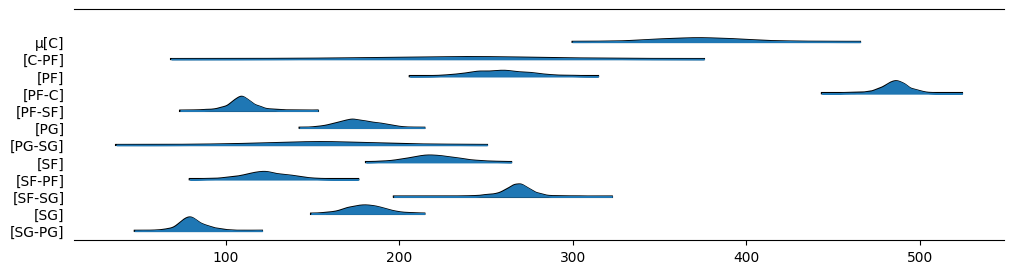

In [21]:
#plots a 99.8% HDI for the positions TRB
az.plot_forest(idata_bsktballG, var_names=['μ'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)


Here is the forest plot model using the gamma likelihood. There was no divergences in the pymc model which means there was no issues. It looks that C-PF and PG-SG position have a very broad range of values and doesn't have a very noticeble median. Other than that, it looks like the others have a a median of the amount of TRB each position has done. I just assume the x-axis is the median of the TRB each position has done.

## Model with Normal Likelihood

In [26]:
#This is model with the Normal likelihood
with pm.Model(coords=pos_coords) as basketball_modelN:
    #hyperpriors. Notice how there's no dims argument
    #this means that the hyperprior is shared across
    #μ_mu and μ_sd builds the μ prior.
    μ_mu = pm.LogNormal('μ_mu', mu = 5, sigma = .5)
    μ_sd = pm.Gamma('μ_sd', mu = 2, sigma=5)

    #priors. There is a different prior,
    #μ has hyperpriors
    μ = pm.Normal('μ',
                  mu = μ_mu,
                  sigma = μ_sd,
                  dims = "Pos")

    σ = pm.LogNormal('σ', mu=2,sigma=.5,
                      dims = "Pos")


    #likelihood
    y = pm.Normal('y',
                  mu = μ[pos_idx],
                  sigma = σ[pos_idx],
                  observed = basketball.TRB)

    #cs for chemshift, h for heirarchical
    idata_bsktballN = pm.sample(target_accept=0.98)

Output()

Output()

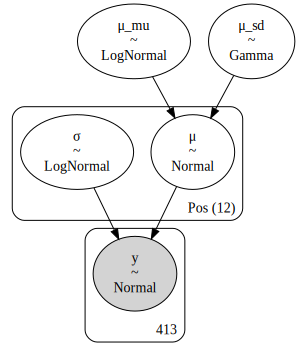

In [27]:
#Helps visualize the model
pm.model_to_graphviz(basketball_modelN)

In [28]:
#Using arviZ to find the rhat values
az.rhat(idata_bsktballN)

<xarray.Dataset> Size: 448B
Dimensions:  (Pos: 12)
Coordinates:
  * Pos      (Pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    μ        (Pos) float64 96B 1.001 1.002 0.9994 1.003 ... 1.001 1.0 1.0 1.002
    μ_mu     float64 8B 0.9995
    μ_sd     float64 8B 1.001
    σ        (Pos) float64 96B 1.002 1.001 1.003 1.001 ... 1.001 0.9995 1.0 1.0

array([<Axes: >], dtype=object)

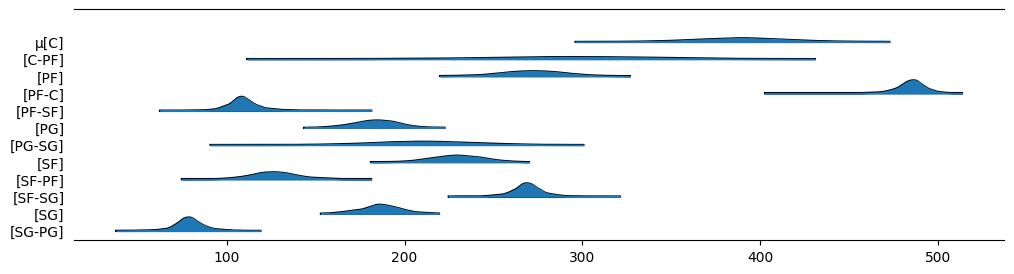

In [29]:
#plots a 99.8% HDI for the positions TRB
az.plot_forest(idata_bsktballN, var_names=['μ'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)

Fortunately, there were no divergences while running the model. I changed the gamma prior to a normal prior and used a normal likelihood. Comparing both forest plots, overall they look the similar in shape and length but there are few differences like a difference like slight difference in length or the height of the curve or the curve is shifted slightly to the left or right, like PF-C.

---
Conclusion

* The PF-C position have done more TRB than the other positions. PG-SG and C-PF have an unclear number of TRB done. On the other hand, PF, PG, SF, and SF-PF have a clear range but doesn't have a clear median. Then PF-C,PF-SF, SF-SG,SG and SG-PG positions have a clear median of TRB.
*   I sort of understand how hyperpriors work but I know that priors can be built from priors
  * I don't understand how the hyperpriors affect a prior
*   I don't know how to read or analyze graphs other than linear graphs, scatterplots and bar graphs. It's harder when they don't have labels on the axis.

